In [37]:
import sys
sys.path.insert(0, '/home/shenwanxiang/Research/aliyun_sync/COMPASS/')
from compass.utils import prepare_crmap_data, personal_crmap_data, draw_personal_crmap
import pandas as pd
%matplotlib inline

## 01 Prepare CRMap Data (All patients)

In [2]:
dfcx = pd.read_csv('https://www.immuno-compass.com/download/other/compass_gide_tpm.tsv', sep = '\t', index_col = 0)

In [3]:
(celltype2output, geneset2celltype, gene2geneset, genetpm2gene,
 dfgn, dfgs, dfct, dfpred, dfcx) = prepare_crmap_data(dfcx, 
                                                      model_path_name = 'https://www.immuno-compass.com/download/model/LOCO/pft_leave_Gide.pt',
                                                      map_location = 'cpu',
                                                      z_scale=True)

Downloading...
From: https://www.immuno-compass.com/download/model/LOCO/pft_leave_Gide.pt
To: /tmp/tmpjthz9q2j


100%|███████████████████████████████████████████████████████████████████████████████| 35.1M/35.1M [00:51<00:00, 687kB/s]


Model downloaded to: /tmp/tmpjthz9q2j


100%|#####################################################################################| 1/1 [00:01<00:00,  1.94s/it]


## 02 Prepare Personal CRMap Data

In [20]:
dfcx.head(5)

,cancer_code,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Index,,,,,,,,,,,,,,,,,,,,,
1_ipiPD1_PRE,0.0,-0.689347,-0.249150,-0.856038,-0.293410,-0.748553,-0.757140,-0.919124,-0.674271,-0.436682,...,0.078115,-0.802111,-1.077512,-0.870153,-1.170595,-0.296469,-1.612454,-1.085344,-1.284846,-1.157044
2_ipiPD1_PRE,0.0,-0.356076,-0.501760,1.935266,-0.307191,-0.671181,-0.757140,-0.241104,-0.853583,-0.470015,...,1.601781,0.104700,-1.243284,-1.489081,0.568941,-0.567675,-1.211916,0.623320,-0.659467,-0.450424
6_ipiPD1_PRE,0.0,-0.893012,-0.501760,-0.634128,-0.292032,-0.837532,-0.838842,-1.216831,-0.856756,-0.481127,...,-1.225617,-1.240743,-1.160398,-1.290140,-1.489681,-0.513434,-1.649759,-1.517999,-1.243852,-1.203239
7_ipiPD1_PRE,0.0,-1.210854,-0.375455,-0.862134,-0.307191,-0.957459,-0.757140,-1.641944,-1.053523,-0.414460,...,-1.375262,-1.231653,-1.243284,-1.783809,-1.973458,-0.567675,-1.804869,-1.238387,-1.642455,-1.343537
8_ipiPD1_PRE,0.0,-0.664660,-0.501760,-0.874144,-0.304435,-0.725342,-0.512035,-0.224582,-0.563193,-0.481127,...,0.932910,0.729695,-0.956372,-0.663844,-0.851508,-0.404951,0.081980,-0.637837,-1.140058,1.250255


In [25]:
## We will generate the CRMap  for patient `1_ipiPD1_PRE`
concept2plot=["IFNg_pathway", "Cytotoxic_Tcell",  'Endothelial', 'TGFb_pathway']
patient_id = "2_ipiPD1_PRE"
crmap_df = personal_crmap_data(
            patient_id=patient_id,
            concept2plot=concept2plot,
            TopK_gene=5,
            celltype2output=celltype2output,
            geneset2celltype=geneset2celltype,
            gene2geneset=gene2geneset,
            genetpm2gene=genetpm2gene,
            dfgn=dfgn, dfgs=dfgs, dfct=dfct, dfpred=dfpred, dfcx=dfcx)

In [26]:
crmap_df.head()

,target,source,weights,group,concept,source_color,target_color,source_value,target_value
0,NR,IFNg_pathway,-0.512413,celltype->output,IFNg_pathway,#9e9d93,#9e9d93,-1.185459,0.999955
1,NR,Cytotoxic_Tcell,-0.406077,celltype->output,Cytotoxic_Tcell,#9e9d93,#9e9d93,-1.563228,0.999955
2,NR,Endothelial,0.093199,celltype->output,Endothelial,#9e9d93,#9e9d93,0.406011,0.999955
3,NR,TGFb_pathway,0.402654,celltype->output,TGFb_pathway,#9e9d93,#9e9d93,0.512699,0.999955
4,R,IFNg_pathway,0.512413,celltype->output,IFNg_pathway,#9e9d93,#9e9d93,-1.185459,0.000045


## 03 Draw Personal CRMap

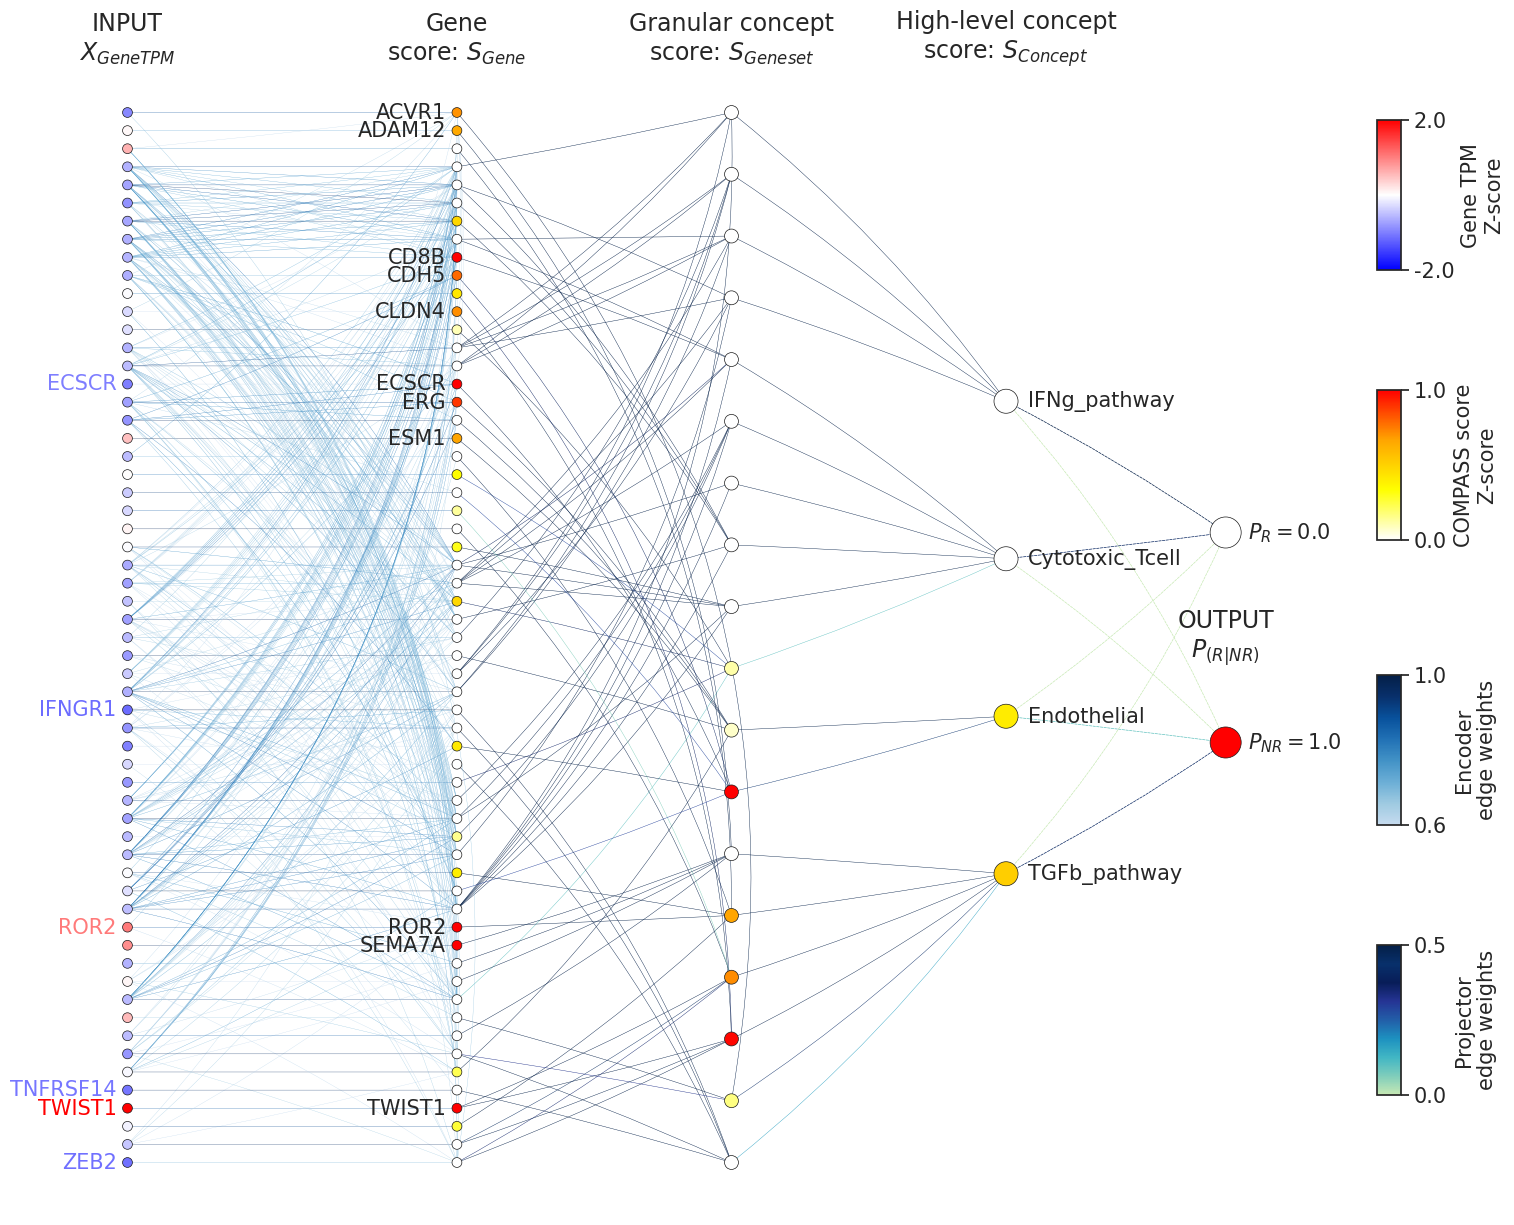

In [38]:
fig = draw_personal_crmap(crmap_df, 
                        concept2plot=concept2plot,
                        figsize=(16, 15),
                        fontsize=15,
                        layer_node_sizes=[0.5, 0.5, 1, 3, 5],
                        max_rad=0.25,
                        show_geneset_name=False,
                        layer_node_gaps={'celltype': 0.15, 'geneset': 0.1, 'output': 0.2},
                        layer_spacing=[1.2, 1, 1, 0.8],)
fig

In [39]:
fig.savefig(f"{patient_id}_CRMap.png", bbox_inches="tight", dpi=150)

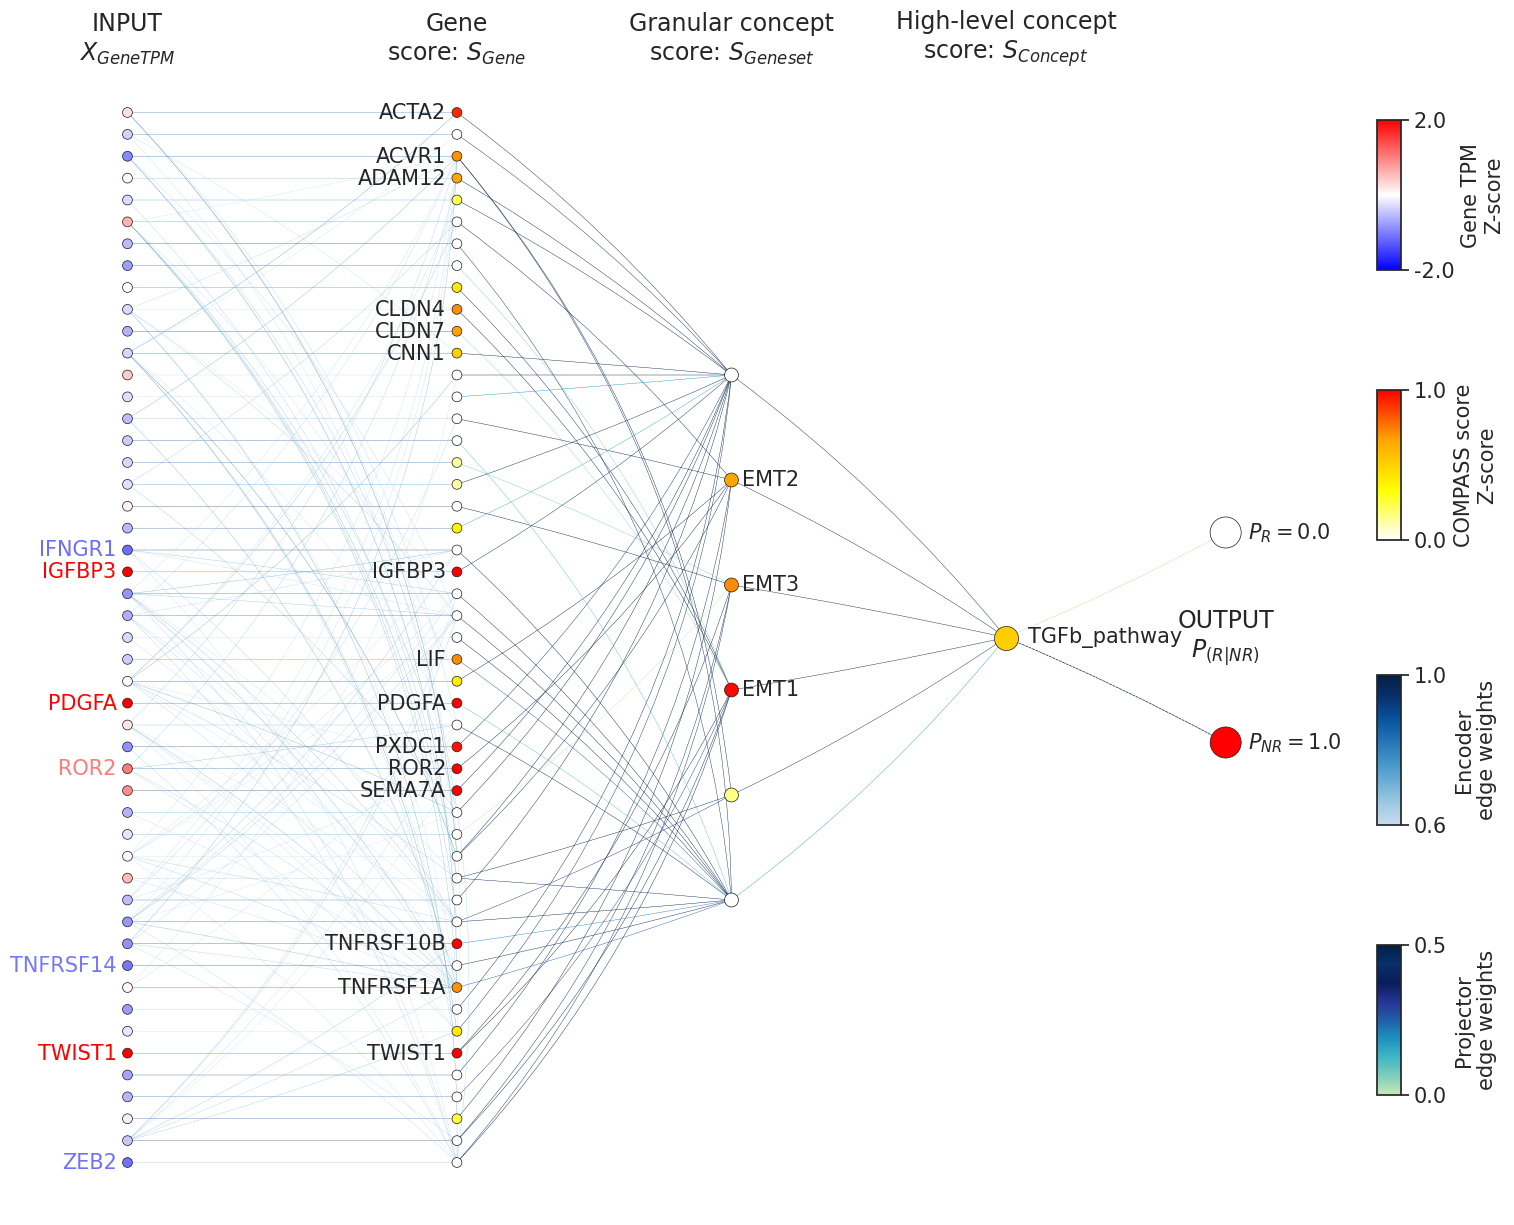

In [42]:
concept2plot=['TGFb_pathway']
patient_id = "2_ipiPD1_PRE"
crmap_df = personal_crmap_data(
            patient_id=patient_id,
            concept2plot=concept2plot,
            TopK_gene=100000,
            celltype2output=celltype2output,
            geneset2celltype=geneset2celltype,
            gene2geneset=gene2geneset,
            genetpm2gene=genetpm2gene,
            dfgn=dfgn, dfgs=dfgs, dfct=dfct, dfpred=dfpred, dfcx=dfcx)

fig = draw_personal_crmap(crmap_df, 
                        concept2plot=concept2plot, show_geneset_name = True)
fig

In [43]:
fig.savefig(f"{patient_id}_CRMap_TGFb.png", bbox_inches="tight", dpi=150)